<a href="https://colab.research.google.com/github/SridharaniKatipally/DataScience-CODSOFT/blob/main/TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/archive (1).zip')  # Update the path accordingly
print(df.head())  # Display the first few rows of the dataset


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
# Basic info about data type and missing values
print(df.info())

# Statistical summary of numerical features
print(df.describe())

# Count of unique values in 'Survived' to see data imbalance
print(df['Survived'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

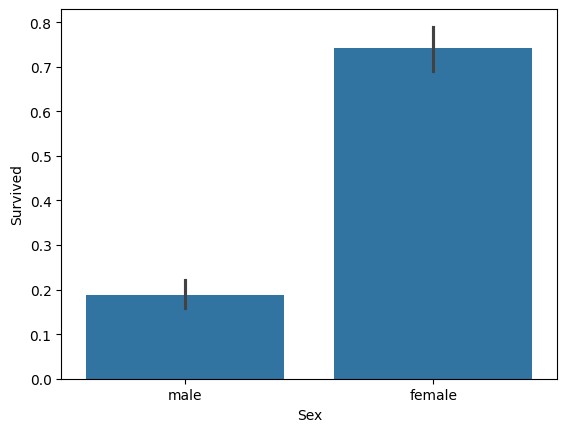

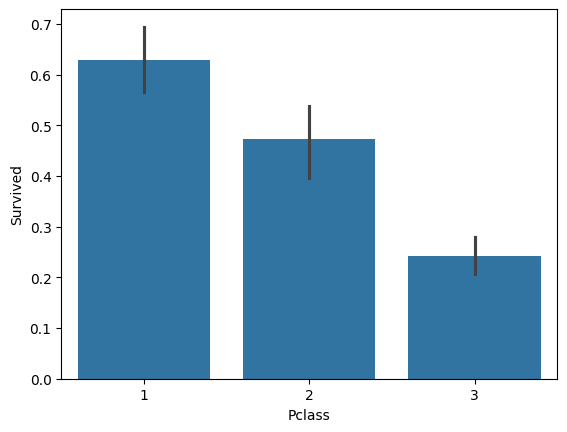

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

# Visualize survival rate by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()



In [ ]:
# Handling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical data to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1}).astype(int)

# If the 'Cabin' feature is too sparse, you can drop it or transform it
df.drop('Cabin', axis=1, inplace=True)

# Convert 'Embarked' to numeric
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and the target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Display data types of each column
print(X_train.dtypes)



PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object


In [ ]:
X_train = X_train.drop(['Name', 'Ticket'], axis=1)
X_test = X_test.drop(['Name', 'Ticket'], axis=1)


In [ ]:
# Assuming 'Embarked' is categorical and was not properly processed
X_train = pd.get_dummies(X_train, columns=['Embarked'])
X_test = pd.get_dummies(X_test, columns=['Embarked'])


In [ ]:
# Check for any null values in the dataset
print(X_train.isnull().sum())
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)


PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked_0     0
Embarked_1     0
Embarked_2     0
dtype: int64


In [ ]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score

# Predictions
predictions = model.predict(X_test)

# Evaluate accuracy
print(f"Accuracy: {accuracy_score(y_test, predictions)}")


Accuracy: 0.8435754189944135


In [ ]:
from sklearn.model_selection import GridSearchCV

# Grid Search for parameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print(CV_rfc.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
